<a href="https://colab.research.google.com/github/Andradeus/Andradeus/blob/main/Aloca%C3%A7%C3%A3o_de_Portf%C3%B3lio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader==0.10

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [ ]:
dados_dict = {} 

tickers = ['abev3', 'bbse3', 'goll4', 'irbr3']

tickers_yahoo = ['ABEV3.SA', 'BBSE3.SA', 'GOLL4.SA', 'IRBR3.SA']

for ticker, ativo in zip(tickers, tickers_yahoo):
  dados_dict[ticker] = pdr.get_data_yahoo(ativo, start = '2015-01-01', end ='2021-12-31')

In [ ]:
dados_dict

In [ ]:
for k, v in dados_dict.items():
  locals() [k] = v

In [ ]:
abev = pd.read_csv('abev3.csv', index_col = 0)
bbse = pd.read_csv('bbse3.csv', index_col = 0)
goll = pd.read_csv('goll4.csv', index_col = 0)
irbr = pd.read_csv('irbr3.csv', index_col = 0)

In [ ]:
dados = {'abev3':abev['Adj Close'],
         'bbse3':bbse['Adj Close'],
         'goll4':goll['Adj Close'],
         'irbr3':irbr['Adj Close']}

df = pd.DataFrame(dados)         

In [ ]:
ret_log = np.log(df).diff()

In [ ]:
np.random.seed(2)

qtd_portfolios = 5000

todos_pesos = np.zeros((qtd_portfolios,len(df.columns)))
ret_array = np.zeros(qtd_portfolios)
vol_array = np.zeros(qtd_portfolios)
sharpe_array = np.zeros(qtd_portfolios)

for ind in range(qtd_portfolios):
  
  pesos = np.array(np.random.random(4))

  pesos = pesos / np.sum(pesos)

  todos_pesos[ind,:] = pesos

  ret_array[ind] = np.sum((ret_log.mean() * pesos) *252)

  vol_array[ind] = np.sqrt(np.dot(pesos.T, np.dot(ret_log.cov() * 252, pesos)))

  sharpe_array[ind] = ret_array[ind]/vol_array[ind]

In [ ]:
print('Sharpe Máximo', sharpe_array.max())

Sharpe Máximo 0.10913857993368027


In [ ]:
print('Posição do Sharpe Máximo', sharpe_array.argmax())

Posição do Sharpe Máximo 2154


In [ ]:
print('Pesos:', todos_pesos[2154,:])

sharpe_max_retorno = ret_array[2154]
sharpe_max_volatilidade = vol_array[2154]

Pesos: [0.62740282 0.36351436 0.00291578 0.00616704]


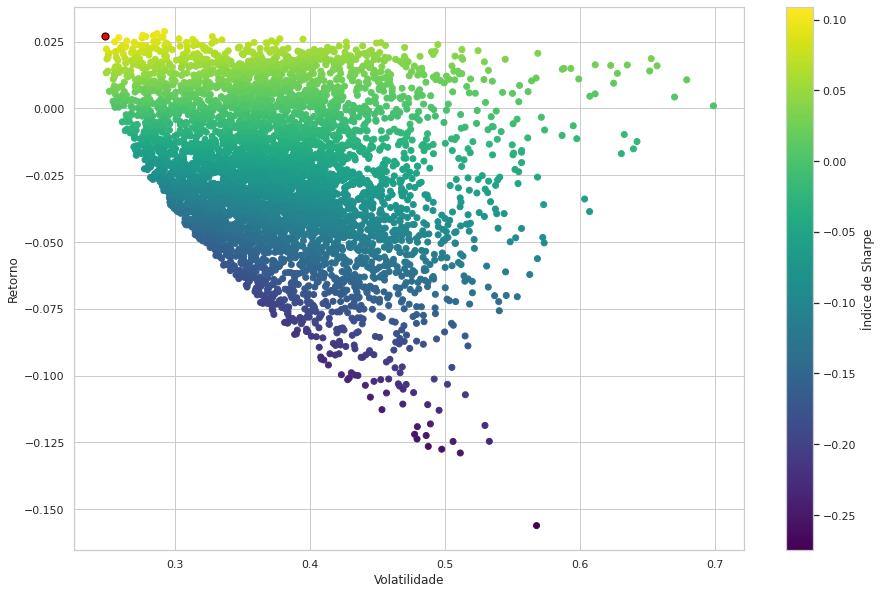

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(vol_array,ret_array,c=sharpe_array,cmap='viridis')
plt.colorbar(label='Índice de Sharpe')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')

plt.scatter(sharpe_max_volatilidade,sharpe_max_retorno,c='red',s=50,edgecolors='black');